<a href="https://colab.research.google.com/github/temesgen0/Customer_Churn_Prediction/blob/main/ChurnCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning, Exploratory Data Analysis and Model Training (machine learning) with Pandas and scikit-learn on Customers Churn

**About the Analysis:** The primary purpose of this kernel is to practice and enhance my skills in data analysis and machine learning.

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

**About the data:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

I used the data [sets](https://www.kaggle.com/datasets/samkayyali/wa-fnusec-telcocustomerchurn) available and began the process of data cleaning followed by Exploratory data analysis (EDA) and Model Training

## Import Library

In [2]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# System and Utility Libraries
import os                               # Operating system functions
import zipfile                          # Reading and writing ZIP archives


## Load and Preprocessing datasets

In [3]:
os.environ['KAGGLE_USERNAME'] = 'temesgenazezew'  # Set your Kaggle username as an environment variable
os.environ['KAGGLE_KEY'] = 'a3402e9e1d8c7af0d485a32e9a7f5218'  # Set your Kaggle API key as an environment variable

!kaggle datasets download -d samkayyali/wa-fnusec-telcocustomerchurn  # Download the 'telcocustomerchurn' dataset from Kaggle


Dataset URL: https://www.kaggle.com/datasets/samkayyali/wa-fnusec-telcocustomerchurn
License(s): CC0-1.0
100% 172k/172k [00:00<00:00, 679kB/s]
100% 172k/172k [00:00<00:00, 679kB/s]


###Extract the Zip file

In [5]:
zip_file_path = "wa-fnusec-telcocustomerchurn.zip"  # Update with the actual path to your ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("telcocustomerchurn")  # Update "destination_directory" with the desired directory path


### Load data

In [6]:
df_customer = pd.read_csv('telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df_customer.head())
print("dataset shape: ", df_customer.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

very good !  
we have above 7000 customers entry with its 21 attributes

In [7]:
# Display column names and data types
column_info = pd.DataFrame({
    'Column Name': df_customer.columns,
    'Data Type': df_customer.dtypes
})

# Display the DataFrame
print(column_info)


                       Column Name Data Type
customerID              customerID    object
gender                      gender    object
SeniorCitizen        SeniorCitizen     int64
Partner                    Partner    object
Dependents              Dependents    object
tenure                      tenure     int64
PhoneService          PhoneService    object
MultipleLines        MultipleLines    object
InternetService    InternetService    object
OnlineSecurity      OnlineSecurity    object
OnlineBackup          OnlineBackup    object
DeviceProtection  DeviceProtection    object
TechSupport            TechSupport    object
StreamingTV            StreamingTV    object
StreamingMovies    StreamingMovies    object
Contract                  Contract    object
PaperlessBilling  PaperlessBilling    object
PaymentMethod        PaymentMethod    object
MonthlyCharges      MonthlyCharges   float64
TotalCharges          TotalCharges    object
Churn                        Churn    object


### Let's Convert data types

In [8]:
# Convert categorical `object` columns to `category` type
for col in df_customer.select_dtypes(include='object').columns:
    # Convert to category if it has fewer unique values than a threshold (indicative of categorical data)
    if df_customer[col].nunique() < 10:
        df_customer[col] = df_customer[col].astype('category')
    else:
        df_customer[col] = df_customer[col].astype(str)  # Convert the rest to string type

# Convert 'TotalCharges' to float, handling any potential non-numeric values
df_customer['TotalCharges'] = pd.to_numeric(df_customer['TotalCharges'], errors='coerce')
# Convert 'SeniorCitizen' to categorical
df_customer['SeniorCitizen'] = df_customer['SeniorCitizen'].astype('category')

# Verify the new data types
print(df_customer.dtypes)


customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


fantastic!  
we have:-
category:17 and  numeric: 3 data types

### Let's check the missing value

In [9]:
# Create a new DataFrame to store missing values and unique counts
missing_and_uniques = pd.DataFrame({
    'Missing': df_customer.isnull().sum(),              # Count of missing values
    'Uniques': df_customer.nunique()                    # Count of unique values
})

# Display the result
print(missing_and_uniques)


                  Missing  Uniques
customerID              0     7043
gender                  0        2
SeniorCitizen           0        2
Partner                 0        2
Dependents              0        2
tenure                  0       73
PhoneService            0        2
MultipleLines           0        3
InternetService         0        3
OnlineSecurity          0        3
OnlineBackup            0        3
DeviceProtection        0        3
TechSupport             0        3
StreamingTV             0        3
StreamingMovies         0        3
Contract                0        3
PaperlessBilling        0        2
PaymentMethod           0        4
MonthlyCharges          0     1585
TotalCharges           11     6530
Churn                   0        2


Nice! the total charges have 11 missing values let's handle them

In [13]:
# Fill NaN values in 'TotalCharges' with the mean of the column
df_customer["TotalCharges"] = df_customer["TotalCharges"].fillna(df_customer['TotalCharges'].mean())

Very interesting.

We can see that we have one entry for each CustomerId  
The dataset don't have missing values  
Some features are categorical  
The target the we will use to guide the exploration is Churn  

Let's investigate the data further.
I will get all categorical features and see their distribution by the target
I will calculate the Churn Rate for each value in categories

## EDA

### Basic Statistics and Data Distribution

In [ ]:
# Summart statistics for numerical columns
df_customer.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Visualize the Target Variable (Churn) Distripution

CUSTOMERS %CHURN:
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


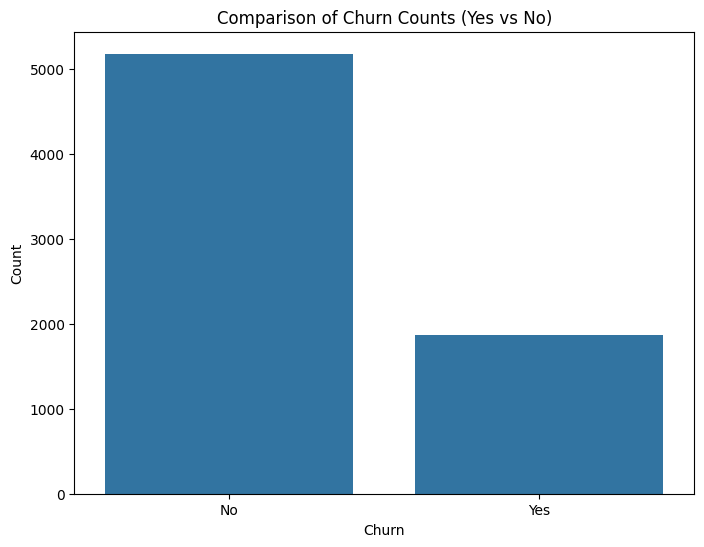

In [ ]:
print("CUSTOMERS %CHURN:")
print(round(df_customer['Churn'].value_counts(normalize=True) * 100,2))
# Set plot size
plt.figure(figsize=(8, 6))

# Create a count plot for the Churn column
sns.countplot(data=df_customer, x='Churn')

# Set plot labels and title
plt.title('Comparison of Churn Counts (Yes vs No)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show plot
plt.show()


We have 26.5% of our data that is about the Churned.

### Analyse Numeric Features
"Do customers with the minimum value of tenure have a higher likelihood of churning? Let's investigate this visually."

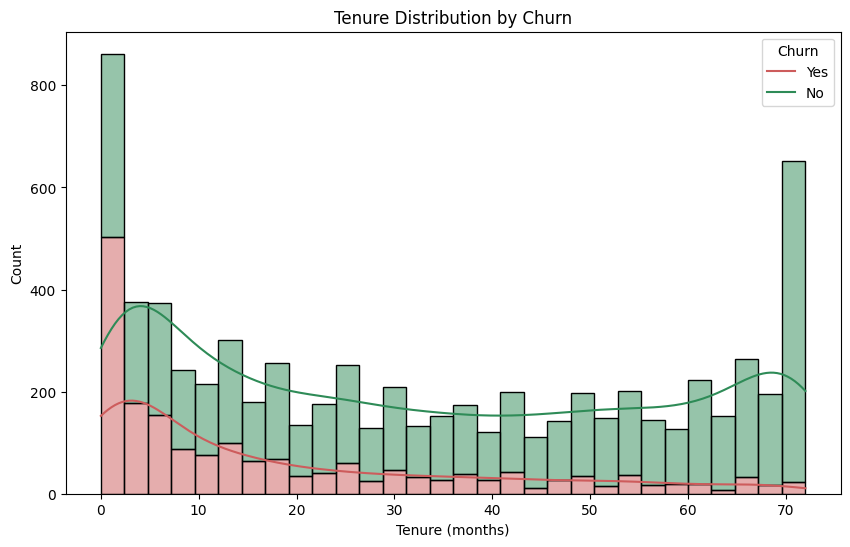

In [ ]:
plt.figure(figsize=(10, 6))

# Plot histogram with seaborn for 'tenure' by 'Churn' in one chart
sns.histplot(data=df_customer, x='tenure', hue='Churn', kde=True, bins=30, palette=['seagreen', 'indianred'], multiple='stack')

# Set plot labels and title
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()


In [ ]:
print("proportion for customers with a tenure of over 70 months ", round(df_customer[df_customer["tenure"] >= 70]["Churn"].value_counts(normalize=True)*100,2))
print("proportion for customers with a tenure of over 60 months  ", round(df_customer[df_customer["tenure"] >= 60]["Churn"].value_counts(normalize=True)*100,2))
print("proportion for customers with a tenure of below 60 months  ", round(df_customer[df_customer["tenure"] < 60]["Churn"].value_counts(normalize=True)*100,2))
print("proportion for customers with a tenure of below 10 months ", round(df_customer[df_customer["tenure"] <= 10]["Churn"].value_counts(normalize=True)*100,2))


proportion for customers with a tenure of over 70 months  Churn
No     96.47
Yes     3.53
Name: proportion, dtype: float64
proportion for customers with a tenure of over 60 months   Churn
No     93.32
Yes     6.68
Name: proportion, dtype: float64
proportion for customers with a tenure of below 60 months   Churn
No     68.17
Yes    31.83
Name: proportion, dtype: float64
proportion for customers with a tenure of below 10 months  Churn
No     50.86
Yes    49.14
Name: proportion, dtype: float64


Very interesting!  

Here’s a detailed interpretation:  
The histogram above shows the distribution of customer tenure (in months) segmented by their churn status (`Churn = Yes` or `Churn = No`).

1. **High Churn for Low Tenure**: A large number of customers with low tenure (0–10 months) have churned (shown in red). This suggests that many customers leave early in their subscription period, indicating potential dissatisfaction or unmet expectations in the initial months.

2. **Lower Churn for Longer Tenure**: As tenure increases, the proportion of customers who churn (red bars) decreases. Most customers with a tenure of over 60 months (5 years) do not churn, which suggests that long-term customers are more likely to remain loyal.

3. **Peak at Maximum Tenure**: There is a notable peak around the maximum tenure (near 70 months) where churn is very low. This may indicate a set of long-term, highly engaged customers who are more satisfied with the service.

4. **Tenure and Stability**: The decreasing churn rate as tenure increases might imply that customers who stay longer are more committed and satisfied, potentially due to factors like accumulated benefits, habit, or strong relationships with the company.

#### Key Takeaways:
- **Early Intervention**: The company should focus on retaining customers within the first year by addressing potential issues that new customers may face.
- **Loyalty Programs**: Implementing loyalty programs or incentives for customers as they approach higher tenure levels could further reduce churn.
- **Customer Feedback**: It may also be valuable to gather feedback from customers in the early months to understand the causes of early churn.

This histogram highlights the importance of tenure in understanding churn patterns and suggests that longer-tenured customers are more stable and less likely to leave.

###Categorical Feature analysis

<ipython-input-25-4a3086ea66ad>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df_customer.groupby([feature, 'Churn']).size().reset_index(name='Counts')
<ipython-input-25-4a3086ea66ad>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df_customer.groupby([feature, 'Churn']).size().reset_index(name='Counts')
<ipython-input-25-4a3086ea66ad>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

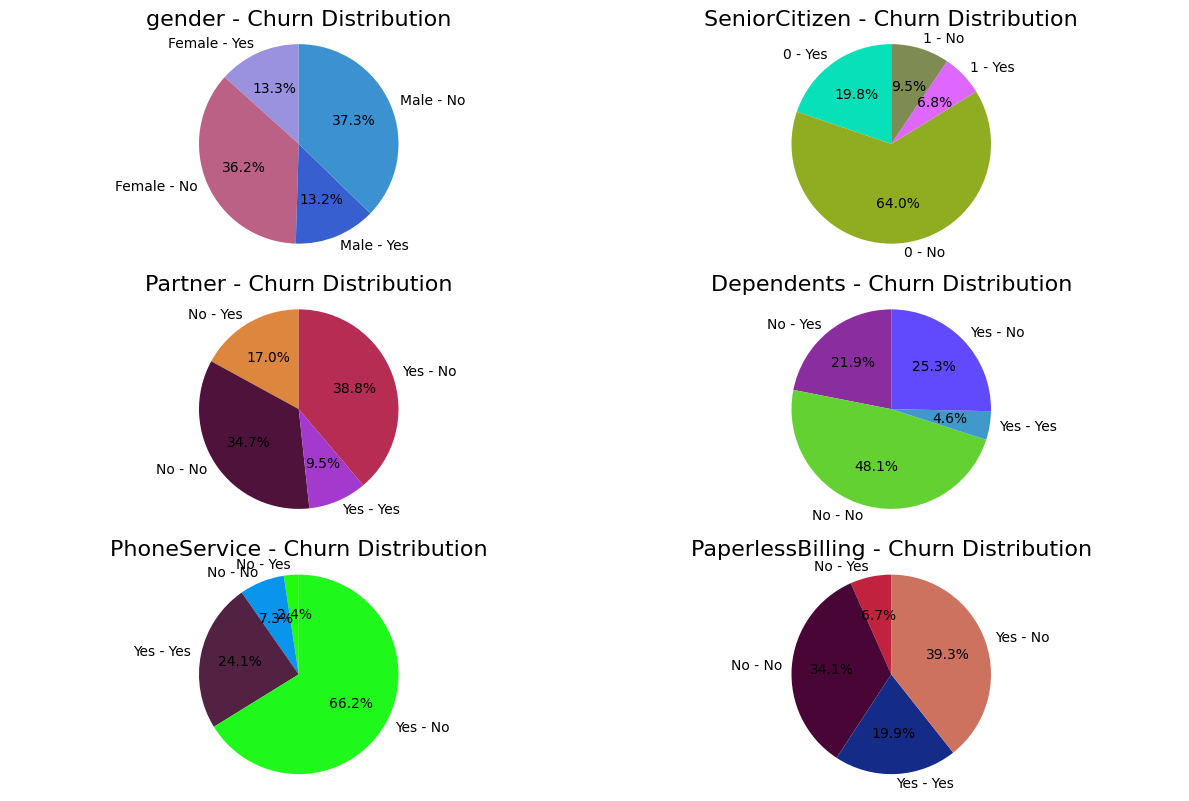

In [25]:
import matplotlib.pyplot as plt
import random

# List of categorical features excluding the target 'Churn'
categorical_features = df_customer.select_dtypes(include='category').columns.drop('Churn')
binary_features = [feature for feature in categorical_features if df_customer[feature].nunique() == 2]

# Function to generate random colors
def generate_random_colors(n):
    return [f"#{''.join([random.choice('0123456789ABCDEF') for _ in range(6)])}" for _ in range(n)]

# Plot binary features as pie charts
plt.figure(figsize=(12, 16))  # Adjust figure size for larger pie charts
for i, feature in enumerate(binary_features, 1):
    # Group data for pie chart preparation
    churn_counts = df_customer.groupby([feature, 'Churn']).size().reset_index(name='Counts')
    feature_values = churn_counts[feature].unique()

    # Prepare labels and values for the pie chart
    pie_labels = []
    pie_counts = []

    for f_val in feature_values:
        yes_count = churn_counts[(churn_counts[feature] == f_val) & (churn_counts['Churn'] == 'Yes')]['Counts'].sum()
        no_count = churn_counts[(churn_counts[feature] == f_val) & (churn_counts['Churn'] == 'No')]['Counts'].sum()
        pie_labels.extend([f"{f_val} - Yes", f"{f_val} - No"])
        pie_counts.extend([yes_count, no_count])

    # Generate random colors for each category
    colors = generate_random_colors(len(pie_labels))

    # Plot the pie chart
    plt.subplot(len(binary_features), 2, i)
    plt.pie(
        pie_counts,
        labels=pie_labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
    )
    plt.title(f"{feature} - Churn Distribution", fontsize=16)
    plt.axis('equal')  # Ensure the pie is drawn as a circle

plt.tight_layout()
plt.show()


### **Interpretation of the Pie Charts**

The pie charts represent the distribution of customer churn based on various binary categorical features (e.g., gender, SeniorCitizen, Partner, Dependents, PhoneService, and PaperlessBilling). Each chart shows the percentage of customers within each category who churned ("Yes") or did not churn ("No"). Below are insights and recommendations derived from the analysis:

#### **1. Gender - Churn Distribution**
- **Observation**:
  - Male customers: 37.3% did not churn, while 13.2% churned.
  - Female customers: 36.2% did not churn, while 13.3% churned.
- **Insight**:
  - Churn is almost equally distributed between males and females.
- **Recommendation**:
  - Gender does not seem to significantly influence churn. Focus on other factors to identify churn causes.

#### **2. SeniorCitizen - Churn Distribution**
- **Observation**:
  - Non-senior citizens (0): 64% did not churn, 19.8% churned.
  - Senior citizens (1): 6.8% churned, and 9.5% did not churn.
- **Insight**:
  - Senior citizens are more likely to churn compared to non-senior citizens.
- **Recommendation**:
  - Offer tailored services or discounts to senior citizens to retain them.
  - Implement strategies like simplified billing or personalized support for this group.

#### **3. Partner - Churn Distribution**
- **Observation**:
  - Customers with partners (Yes): 9.5% churned, 38.8% did not churn.
  - Customers without partners (No): 17% churned, 34.7% did not churn.
- **Insight**:
  - Customers without partners are more likely to churn than those with partners.
- **Recommendation**:
  - Provide community-oriented programs or benefits for single customers to increase engagement.

#### **4. Dependents - Churn Distribution**
- **Observation**:
  - Customers without dependents (No): 48.1% did not churn, 21.9% churned.
  - Customers with dependents (Yes): 4.6% churned, 25.3% did not churn.
- **Insight**:
  - Customers without dependents are more likely to churn compared to those with dependents.
- **Recommendation**:
  - For customers without dependents, offer loyalty programs, discounts, or personalized plans to reduce churn.

#### **5. PhoneService - Churn Distribution**
- **Observation**:
  - Customers with phone service (Yes): 24.1% did not churn, 66.2% churned.
  - Customers without phone service (No): 7.3% churned, and only a small proportion did not churn.
- **Insight**:
  - Most customers have phone service, and a significant portion of churn occurs in this group.
- **Recommendation**:
  - Assess the quality and pricing of the phone service to identify potential dissatisfaction.
  - Offer bundled services or improve customer support for phone service users.

#### **6. PaperlessBilling - Churn Distribution**
- **Observation**:
  - Customers with paperless billing (Yes): 39.3% churned, 19.9% did not churn.
  - Customers without paperless billing (No): 34.1% did not churn, and 6.7% churned.
- **Insight**:
  - Customers with paperless billing are more likely to churn than those without it.
- **Recommendation**:
  - Investigate if customers using paperless billing face usability issues or lack confidence in the system.
  - Provide clear communication, tutorials, or incentives for using paperless billing effectively.

### **General Observations**
- **Churn Patterns**: Certain features like being a senior citizen, not having a partner, and using paperless billing are associated with higher churn.
- **Retaining Strategies**: Focus on these groups with tailored plans, incentives, or improved service offerings.

### **Actionable Recommendations**
1. **Target Senior Citizens**: Simplify plans, provide better customer support, and introduce senior-specific loyalty benefits.
2. **Engage Single Customers**: Design engagement campaigns or offer community programs to build relationships.
3. **Address Paperless Billing Issues**: Educate users about the benefits of paperless billing and ensure the process is seamless.
4. **Phone Service Improvements**: Monitor service quality and address complaints proactively to reduce churn.



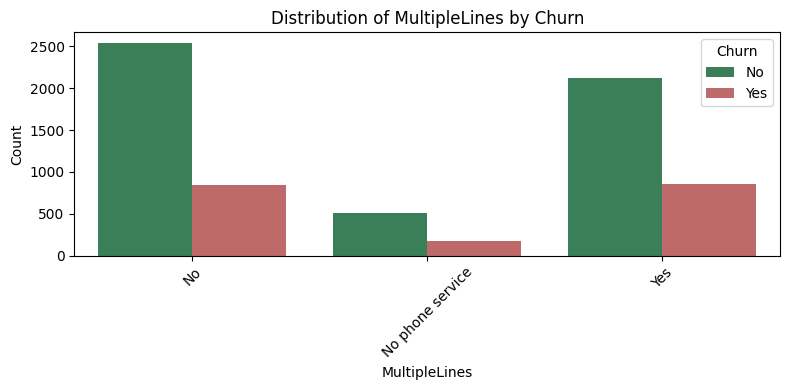

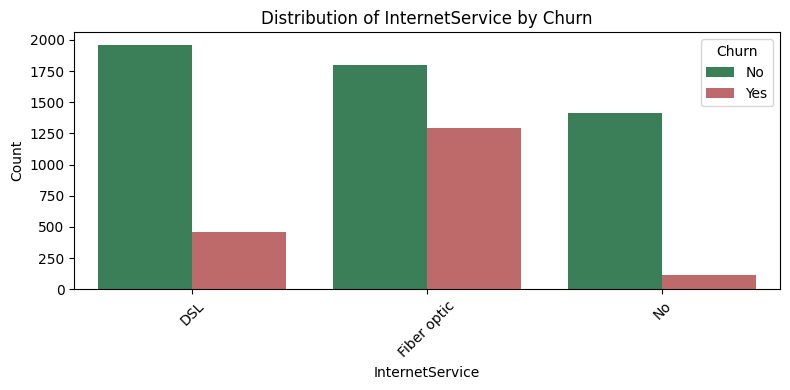

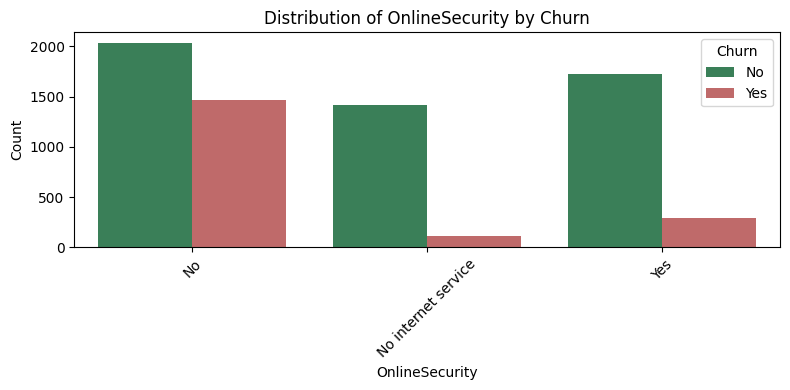

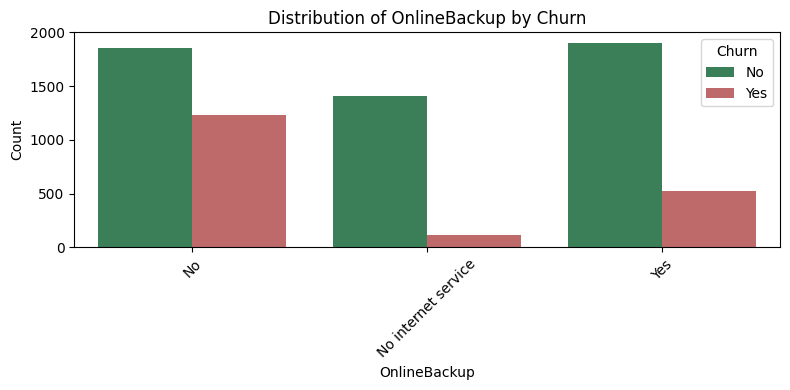

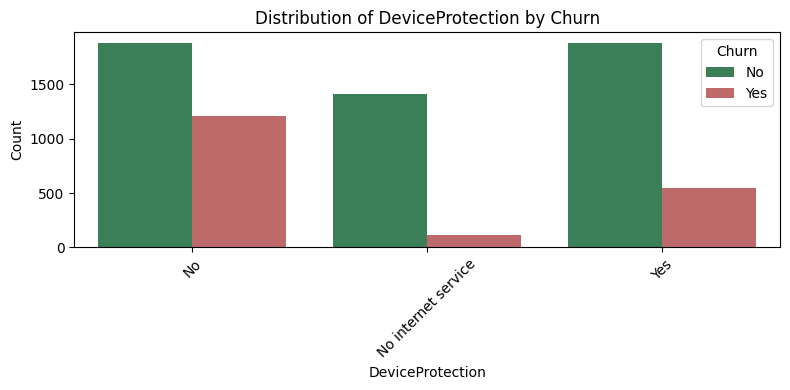

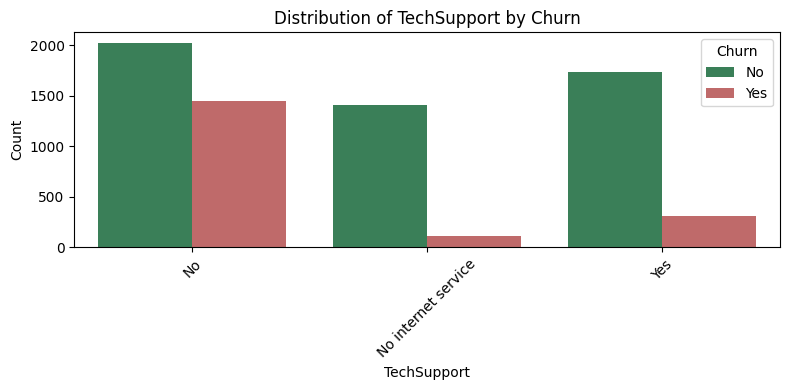

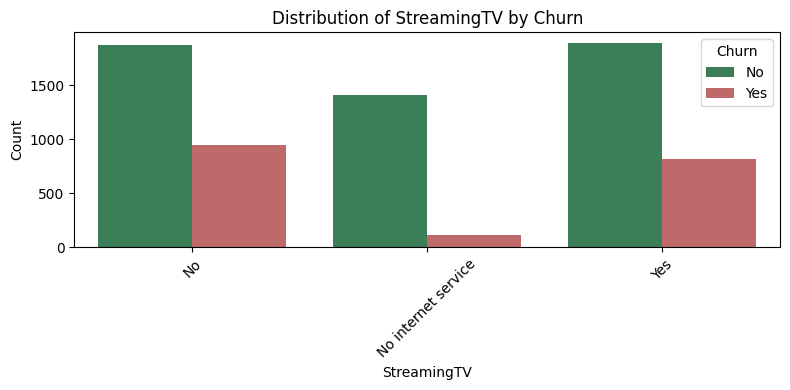

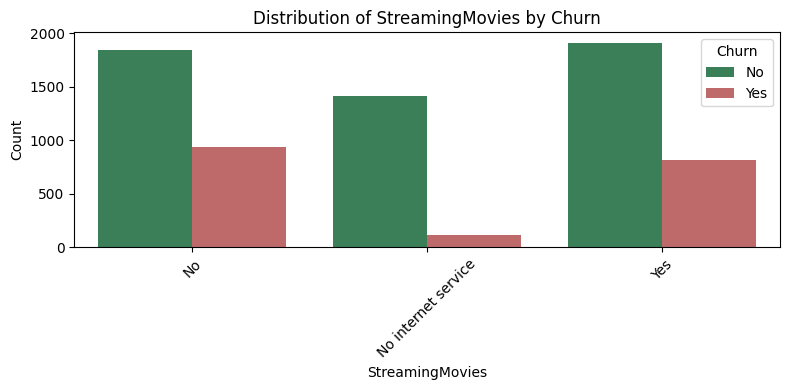

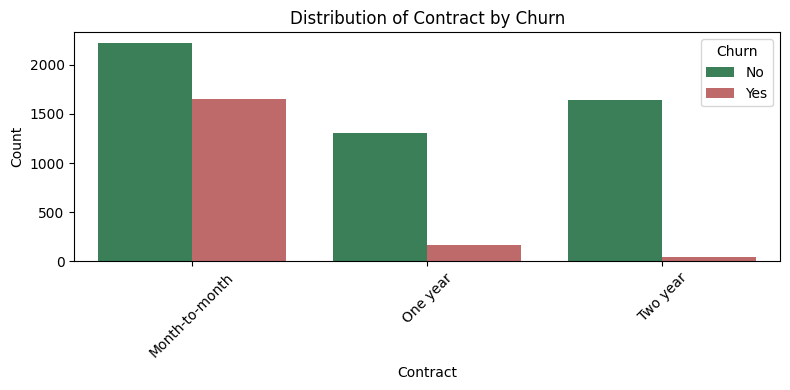

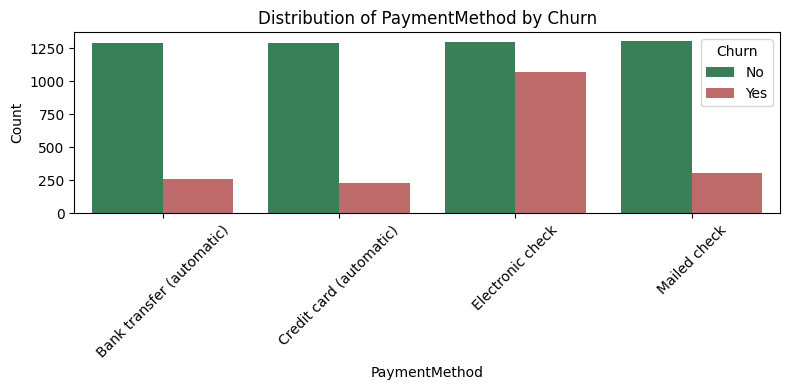

In [26]:
# List of categorical features excluding the target 'Churn'
categorical_features = df_customer.select_dtypes(include='category').columns.drop('Churn')
# Separate features based on the number of unique categories
multi_category_features = [feature for feature in categorical_features if df_customer[feature].nunique() > 2]

# Plot multi-category features as bar charts
for i, feature in enumerate(multi_category_features, 1):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_customer, x=feature, hue='Churn', palette=['seagreen', 'indianred'])
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




The bar charts above show the churn rate for different categorical features. Here’s a breakdown of each one:

 #### Distribution of InternetService by Churn

**Key Observations:**

1. Fiber Optic and Churn: Customers with Fiber Optic internet service have the highest churn rate. The number of customers who churned with this type of service is significantly higher than those who did not churn.

2. No Internet Service and Churn: Customers with no internet service have the lowest churn rate. The number of customers who churned with no internet service is significantly lower than those who did not churn.

**Possible Insights:**

1. Internet Service Type and Loyalty: The type of internet service seems to be a factor in customer churn. Fiber Optic customers might be more likely to churn compared to DSL customers.

2. Targeted Retention Strategies: Different retention strategies might be needed for different internet service types. For example, offering incentives or special promotions to Fiber Optic customers could help reduce churn.

#### Distribution of Contract by Churn

**Key Observations:**
1. Month-to-Month Contracts and Churn: Customers with month-to-month contracts have the highest churn rate. The number of customers who churned with this type of contract is significantly higher than those who did not churn.

2. Two-Year Contracts and Churn: Customers with two-year contracts exhibit the lowest churn rate. The number of customers who churned with this type of contract is significantly lower than those who did not churn.

**Possible Insights:**

1. Contract Duration and Loyalty: The longer the contract duration, the lower the churn rate. This suggests that customers with longer-term commitments are more likely to stay with the service.

2. Month-to-Month Contracts as a Risk: Month-to-month contracts seem to be a significant factor in customer churn. It might be beneficial to encourage customers to switch to longer-term contracts to reduce churn.

3. Targeted Retention Strategies: Different retention strategies might be needed for different contract types. For example, offering incentives or special promotions to month-to-month customers could help reduce churn.

 #### Distribution of PaymentMethod by Churn

**Key Observations:**

1. Electronic Check and Churn: Customers with Electronic Check payment method have the highest churn rate. The number of customers who churned with this payment method is significantly higher than those who did not churn.

2. Other Payment Methods: Customers with other payment methods (Bank transfer (automatic), Credit card (automatic), and Mailed check) have similar churn rates. The number of customers who churned with these payment methods is relatively low compared to those who did not churn.

**Possible Insights:**

1. Payment Method and Loyalty: The payment method might be a factor in customer churn. Customers with Electronic Check payment method might be more likely to churn compared to those with other payment methods.

2. Targeted Retention Strategies: Different retention strategies might be needed for different payment methods. For example, offering incentives or special promotions to customers with Electronic Check payment method could help reduce churn.


### Bivariate Analysis (Categorical & Numerical Features by Churn)

Churn by Tenure Groups: Create tenure groups (e.g., new, loyal) and calculate the churn rate for each group.
python
Copy code

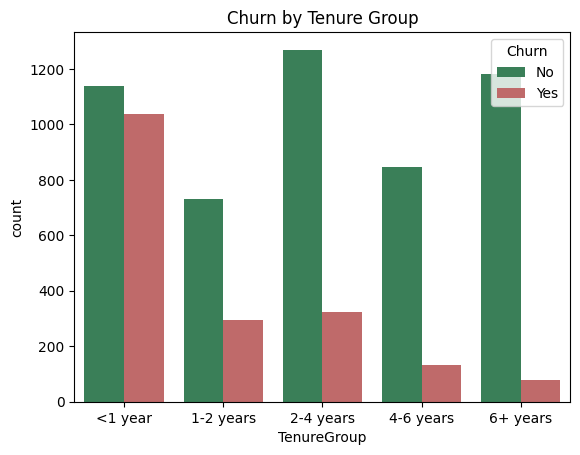

In [ ]:
df_customer['TenureGroup'] = pd.cut(df_customer['tenure'], bins=[0, 12, 24, 48, 62, df_customer['tenure'].max()], labels=['<1 year', '1-2 years', '2-4 years', '4-6 years', '6+ years'])
sns.countplot(data=df_customer, x='TenureGroup', hue='Churn', palette=['seagreen', 'indianred'])
plt.title('Churn by Tenure Group')
plt.show()

Excellent!  
The chart depicts customer churn segmented by tenure group, with the following insights:

1. **Churn Rates**:
   - **<1 year**: High churn rate, nearly equal counts of customers who churned ("Yes") and did not churn ("No").
   - **1-2 years**: Churn rates drop, with more customers staying ("No") than leaving ("Yes").
   - **2-4 years**: The number of customers not churning ("No") significantly increases, with churn ("Yes") being lower.
   - **4-6 years**: Churn ("Yes") continues to decrease, and most customers stay ("No").
   - **6+ years**: The lowest churn rate, with a large number of customers staying ("No") compared to those leaving ("Yes").

**Overall Interpretation**:
- Newer customers (less than 1 year of tenure) have a higher propensity to churn.
- As tenure increases, the likelihood of churn decreases, suggesting that longer-tenured customers are more likely to remain with the company.

Correlation Feature Analysis

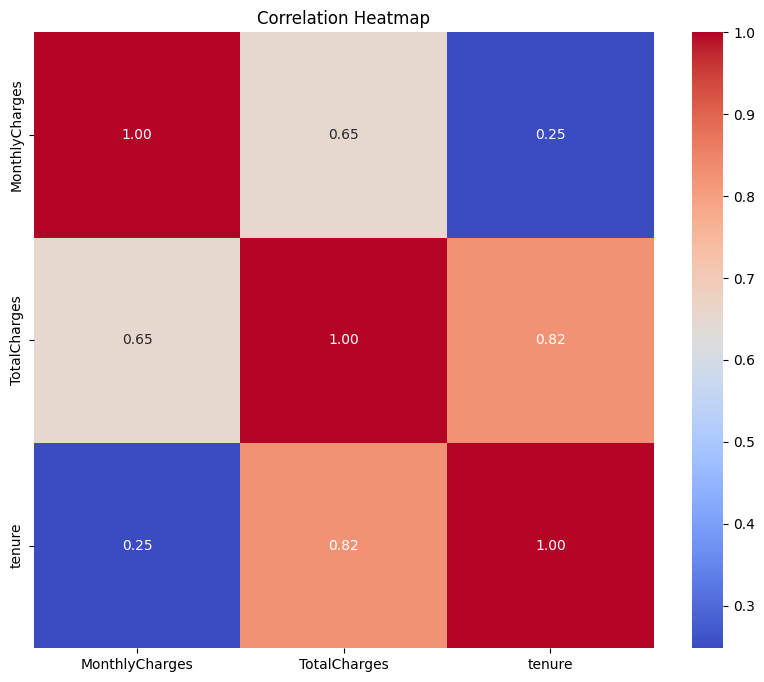

In [ ]:
# Corrrlation Heatmap
numeric_cols=["MonthlyCharges", "TotalCharges", "tenure" ]

plt.figure(figsize=(10,8))
corr_matrix=df_customer[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# List of categorical columns excluding 'Churn'
categorical_features = df_customer.select_dtypes(include=['category']).columns.drop('Churn')

# Dictionary to store the results
chi2_results = {}

# Chi-Square test for each categorical column against 'Churn'
for col in categorical_features:
    contingency_table = pd.crosstab(df_customer[col], df_customer['Churn'])  # Create a contingency table
    chi2, p, _, _ = chi2_contingency(contingency_table)    # Perform Chi-Square test
    chi2_results[col] = p                                  # Store the p-value in the dictionary

# Convert results to a DataFrame for easy viewing
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'P-Value'])
chi2_df['Significant'] = chi2_df['P-Value'] < 0.05  # Add a significance column

# Display the results
print(chi2_df)


             Feature        P-Value  Significant
0             gender   4.865787e-01        False
1      SeniorCitizen   1.510067e-36         True
2            Partner   2.139911e-36         True
3         Dependents   4.924922e-43         True
4       PhoneService   3.387825e-01        False
5      MultipleLines   3.464383e-03         True
6    InternetService  9.571788e-160         True
7     OnlineSecurity  2.661150e-185         True
8       OnlineBackup  2.079759e-131         True
9   DeviceProtection  5.505219e-122         True
10       TechSupport  1.443084e-180         True
11       StreamingTV   5.528994e-82         True
12   StreamingMovies   2.667757e-82         True
13          Contract  5.863038e-258         True
14  PaperlessBilling   4.073355e-58         True
15     PaymentMethod  3.682355e-140         True


# Machine Learning (Customer Churn Model Training)

**Goal:** The primary goal is to predict the probability of a customer churning within a specific timeframe, such as the next month or quarter.  
**Business Impact:** Use predictions to proactively reach out to at-risk customers, reduce churn, and increase customer retention.

## Let's ready the Data to Model Training

### Import Necessary Libraries

In [27]:
#sample oversampling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


### Separate the Features and Target

In [28]:
# define y and X
y = df_customer['Churn']
X = df_customer.drop(['customerID','Churn'],axis=1)

In [ ]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


### Split the Data into Train and Test Sets

In [29]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Encode Categorical Columns
Binary Encoding (0 and 1): For columns with two categories, encode them with 0 and 1.  
Ordinal Encoding (0, 1, 2, ...): For columns with more than two categories, encode each unique value as a separate integer.  

In [30]:
# Define categorical columns
binary_columns = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # Example binary columns
multi_category_columns = ["MultipleLines",'InternetService', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                          'Contract', 'PaymentMethod']  # Example multi-category columns

# Binary encoding
label_encoder = LabelEncoder()
for col in binary_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Multi-category encoding
for col in multi_category_columns:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes


In [31]:
# Encode the 'Churn' column in y_train and y_test
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Fit and transform on the training set
y_test = label_encoder.transform(y_test)        # Transform on the test set only


 ### Standardize the Numeric Columns
Standardize the numeric columns so they have a mean of 0 and standard deviation of 1. This helps certain machine learning models perform better, especially models sensitive to feature scaling.

### Balance the Target Using SMOTE
Apply SMOTE on the training set to balance the target variable. Only do this on the training data to avoid data leakage.


In [32]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [33]:
# If y_train is an array, convert it to a pandas Series to use value_counts()
y_train_series = pd.Series(y_train)
y_train_series.value_counts()


,count
0,4139
1,4139


### Standardize the Numeric Columns
Standardize the numeric columns so they have a mean of 0 and standard deviation of 1. This helps certain machine learning models perform better, especially models sensitive to feature scaling.

In [39]:
# Define numeric columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Fit on train, transform both train and test sets
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


### Summary
We split the data into train and test sets.  
We encoded binary and multi-categorical features.  
We balanced the training data using SMOTE.  
We standardized the numeric features in both train and test sets.   

This data is now ready for model training, which can help to predict churn with a more balanced and well-preprocessed dataset.  

## Model Training

### Train the Logistic Regression Model
Fit the Logistic Regression model to the training data.

In [40]:
# Initialize and fit Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Evaluate the Model
Evaluate the model’s performance on the test data.

In [41]:
# Predict on test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC AUC, we need probability scores

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')


Accuracy: 0.7516
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409

Confusion Matrix:
[[791 244]
 [106 268]]
ROC-AUC Score: 0.8221


### Hyperparameter Tuning
First, use RandomizedSearchCV to perform a broader search over a random set of hyperparameters, which can be faster and more efficient. Once the best parameters are identified from the randomized search, you can refine the search using GridSearchCV to hone in on the optimal values. Here’s how to implement it:  
#### **Steps**
1. Set up a parameter grid with a broader range for RandomizedSearchCV.
2. Run RandomizedSearchCV to get the best combination of hyperparameters.
3. Refine the parameter grid based on the best parameters found from RandomizedSearchCV.
4. Run GridSearchCV using the refined grid for final tuning.

#### Step 1: Set up a Parameter Grid for RandomizedSearchCV

In [42]:
# Define the parameter grid for RandomizedSearchCV
random_param_grid = {
    'C': np.logspace(-3, 3, 10),       # C values from 0.001 to 1000 (regularization strength)
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Different solvers
    'penalty': ["l1",'l2', 'none'],         # Penalty types
    'max_iter': [10,100, 200, 500, 1000,2000]  # Different max iterations
}

# Initialize RandomizedSearchCV with LogisticRegression
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=random_param_grid,
    n_iter=20,                          # Number of random parameter combinations
    scoring='roc_auc',
    cv=5,                               # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                           # Use all available cores
)

# Fit to the training data
random_search.fit(X_train, y_train)

# Display the best parameters from RandomizedSearchCV
print("Best parameters from RandomizedSearchCV:")
print(random_search.best_params_)


Best parameters from RandomizedSearchCV:
{'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 46.41588833612773}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

#### Step 2: Refine the Parameter Grid for GridSearchCV
Using the best parameters from RandomizedSearchCV, refine the grid for GridSearchCV. For example, if C was found to be around 1, you might test a narrower range around that value.

In [43]:
# Generate a synthetic dataset
#X_train, y_train = make_classification(n_samples=1000, n_features=19, n_classes=2, random_state=42)
# Use the best parameters to refine the grid
refined_param_grid = {
    'C': [random_search.best_params_['C'] - 10, random_search.best_params_['C'], random_search.best_params_['C'] + 10],
    'solver': [random_search.best_params_['solver']],  # Use the best solver from RandomizedSearchCV
    'penalty': [random_search.best_params_['penalty']],  # Use the best penalty from RandomizedSearchCV
    'max_iter': [random_search.best_params_['max_iter'] - 100, random_search.best_params_['max_iter'], random_search.best_params_['max_iter'] + 100],

}
# Define StratifiedKFold for cross-validation
#stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV with LogisticRegression
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=refined_param_grid,
    scoring='roc_auc',
    cv=5,                               # 5-fold cross-validation
    n_jobs=-1
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters from GridSearchCV
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)


Best parameters from GridSearchCV:
{'C': 56.41588833612773, 'max_iter': 400, 'penalty': 'l2', 'solver': 'saga'}
Best ROC-AUC Score: 0.8808203060546438


#### Step 3: Use the Best Model
The best model found through grid_search can be used for predictions or further evaluation:

In [44]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model

# Accuracy
best_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
best_roc=roc_auc_score(y_test, y_proba)
print(f"Final Model ROC-AUC Score:{best_roc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7516
Final Model ROC-AUC Score:0.8223
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [ ]:
reg_eval = pd.DataFrame({"Attripute": ["Accuracy", "ROC_AUC"], "Reg_Model": [accuracy, roc_auc], "Reg_best_model":[best_accuracy,  best_roc]})

<Axes: xlabel='Attripute'>

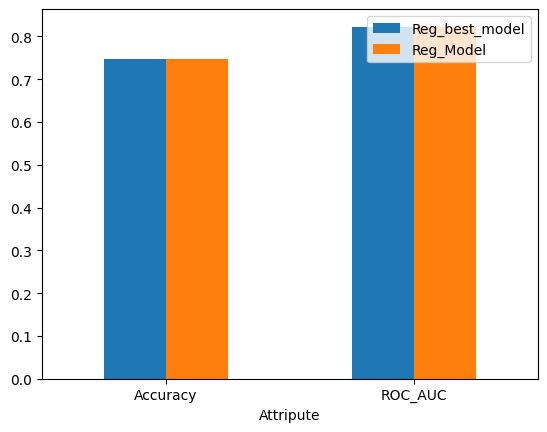

In [ ]:
reg_eval.plot.bar(x="Attripute", y=["Reg_best_model", "Reg_Model"], rot=0)

 ### Set Up Initial XGBoost Model

In [45]:
# Initialize XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',  # Use AUC as the evaluation metric
    use_label_encoder=False
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:24:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


####Evaluate the Model
Use evaluation metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.

In [46]:

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.7707594038325053
Precision: 0.5645569620253165
Recall: 0.5962566844919787
F1 Score: 0.5799739921976593
ROC-AUC Score: 0.8098039215686276


#### Hyperparameter Tuning with RandomizedSearchCV and GridSearchCV
For XGBoost, hyperparameters like n_estimators, learning_rate, max_depth, and subsample often have a significant impact. We’ll start with a randomized search and then fine-tune with grid search.

#####RandomizedSearchCV for Broad Parameter Tuning



In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for random search
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',  # Target AUC as the metric
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit random search to data
random_search.fit(X_train, y_train)

# Best parameters from random search
print("Best Parameters from Randomized Search:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from Randomized Search: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}


#####GridSearchCV for Fine-Tuning on Promising Parameters
Using the best parameters from the randomized search, we can fine-tune further.

In [48]:
# Define narrowed parameter grid based on RandomizedSearchCV results
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 100, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 100],
    'learning_rate': [random_search.best_params_['learning_rate'] * 0.5, random_search.best_params_['learning_rate'], random_search.best_params_['learning_rate'] * 1.5],
    'max_depth': [random_search.best_params_['max_depth'] - 1, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 1],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from Grid Search: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300}


#####Evaluate the Final Model
With the best parameters, retrain the model and evaluate on the test set:

In [49]:
# Best estimator from Grid Search
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate
best_accuracy_xg = accuracy_score(y_test, y_pred)

y_pred = best_xgb_model.predict(X_test)
best_roc_auc_xg = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print("Accuracy:", best_accuracy_xg)
print("Final ROC-AUC Score:", best_roc_auc_xg)


Accuracy: 0.7707594038325053
Final ROC-AUC Score: 0.8180151902658297


<Axes: xlabel='Attripute'>

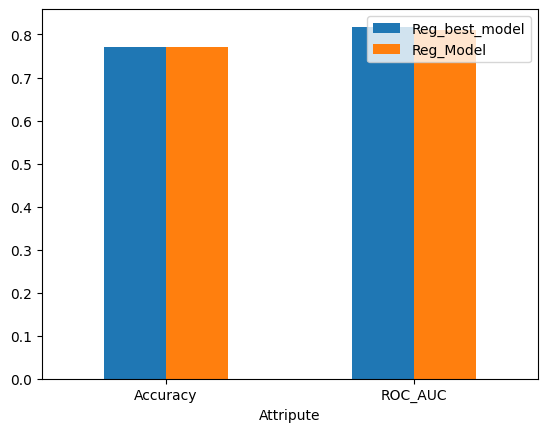

In [50]:
reg_eval = pd.DataFrame({"Attripute": ["Accuracy", "ROC_AUC"], "Reg_Model": [accuracy, roc_auc], "Reg_best_model":[best_accuracy_xg,  best_roc_auc_xg]})
reg_eval.plot.bar(x="Attripute", y=["Reg_best_model", "Reg_Model"], rot=0)

<Axes: xlabel='Attripute'>

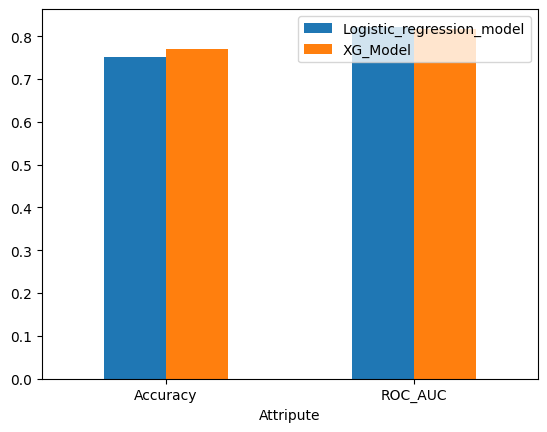

In [51]:
reg_eval = pd.DataFrame({"Attripute": ["Accuracy", "ROC_AUC"], "Logistic_regression_model": [best_accuracy, best_roc], "XG_Model":[best_accuracy_xg,  best_roc_auc_xg]})
reg_eval.plot.bar(x="Attripute", y=["Logistic_regression_model", "XG_Model"], rot=0)

### Train an Initial Random Forest Model

In [52]:
# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


##### Evaluate the Initial Model
Evaluate the model with metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score.

In [53]:
# Evaluate initial model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.7828246983676366
Precision: 0.5918918918918918
Recall: 0.5855614973262032
F1 Score: 0.5887096774193549
ROC-AUC Score: 0.8225335193365884


#### Hyperparameter Tuning with RandomizedSearchCV
RandomizedSearchCV is used to find a rough range of optimal parameters, which can then be fine-tuned further with GridSearchCV.

In [54]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit random search to data
random_search.fit(X_train, y_train)

# Best parameters from random search
print("Best Parameters from Randomized Search:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
85 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters from Randomized Search: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


#### Fine-Tuning with GridSearchCV
Now, use GridSearchCV with a narrower parameter grid based on the best parameters from RandomizedSearchCV.

In [ ]:
# Define a smaller grid based on results from RandomizedSearchCV
param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 100, random_search.best_params_['n_estimators'], random_search.best_params_['n_estimators'] + 100],
    'max_depth': [random_search.best_params_['max_depth'] - 10, random_search.best_params_['max_depth'], random_search.best_params_['max_depth'] + 10],
    'max_features': [random_search.best_params_['max_features']],
    'min_samples_split': [random_search.best_params_['min_samples_split'] - 1, random_search.best_params_['min_samples_split'], random_search.best_params_['min_samples_split'] + 1],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters from Grid Search:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters from Grid Search: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 600}


#### Evaluate the Final Model
With the best parameters found, train a final Random Forest model and evaluate it.


In [55]:
# Best estimator from Grid Search
best_rf_model = grid_search.best_estimator_
best_accuracy_rf = accuracy_score(y_test, y_pred)

# Predict and evaluate
y_pred = best_rf_model.predict(X_test)
best_roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("Accuracy:", best_accuracy_rf)
print("Final ROC-AUC Score:", best_roc_auc_rf)


Accuracy: 0.7828246983676366
Final ROC-AUC Score: 0.8180151902658297


### Deep learning
#### Preprocess the Data
Normalize the numeric features for optimal deep learning performance

In [56]:
# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
# Check for NaNs in training and test sets
print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaNs in X_test_scaled:", np.isnan(X_test_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())


NaNs in X_train_scaled: 0
NaNs in X_test_scaled: 0
NaNs in y_train: 0
NaNs in y_test: 0


In [ ]:
# Fill NaNs with the mean value in each column of the training and test data
X_train_scaled = np.nan_to_num(X_train_scaled, nan=np.nanmean(X_train_scaled))
X_test_scaled = np.nan_to_num(X_test_scaled, nan=np.nanmean(X_test_scaled))


#### Build the Neural Network Model

In [58]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train the Model
Train the model with validation to monitor performance and avoid overfitting.

In [60]:
# Fit the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8410 - loss: 0.3650 - val_accuracy: 0.8738 - val_loss: 0.2893
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8401 - loss: 0.3534 - val_accuracy: 0.8822 - val_loss: 0.2703
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8378 - loss: 0.3513 - val_accuracy: 0.9028 - val_loss: 0.2264
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8433 - loss: 0.3573 - val_accuracy: 0.9070 - val_loss: 0.2212
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8425 - loss: 0.3476 - val_accuracy: 0.9052 - val_loss: 0.2212
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8417 - loss: 0.3498 - val_accuracy: 0.8925 - val_loss: 0.2658
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8394 - loss: 0.3521 - val_accuracy: 0.8720 - val_loss: 0.2792
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8376 - loss: 0.3543 - val_accuracy: 0.

 #### Evaluate the Model on Test Data
 Evaluate the model and calculate metrics like accuracy, precision, recall, F1 score, and ROC-AUC.


In [61]:
# Predict and calculate ROC-AUC
y_pred_proba = model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Convert probabilities to binary predictions for metrics
y_pred = (y_pred_proba > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.758694109297374
Precision: 0.5461956521739131
Recall: 0.5374331550802139
F1 Score: 0.5417789757412399
ROC-AUC Score: 0.8016934046345812


### Segment customers based on churn probability (high, medium, and low risk)
Create a threshold to categorize customers based on their predicted churn probability.

In [62]:
# Step 1: Define the risk categories
def categorize_risk(probability):
    if probability > 0.7:
        return 'High Risk'
    elif probability > 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Step 2: Apply the categorization function
risk_categories = [categorize_risk(prob) for prob in y_pred_proba]

# Step 3: Add the new risk categories to a DataFrame for better tracking
df_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Assuming X_test is a DataFrame
df_test['Churn Probability'] = y_pred_proba
df_test['Risk Category'] = risk_categories

# Step 4: Display the segmented data
print(df_test[['Churn Probability', 'Risk Category']].head())


print(df_test['Risk Category'].value_counts())


   Churn Probability Risk Category
0           0.029716      Low Risk
1           0.994672     High Risk
2           0.006590      Low Risk
3           0.013582      Low Risk
4           0.025673      Low Risk
Risk Category
Low Risk       944
Medium Risk    258
High Risk      207
Name: count, dtype: int64


<Axes: xlabel='Attripute'>

<Figure size 1600x400 with 0 Axes>

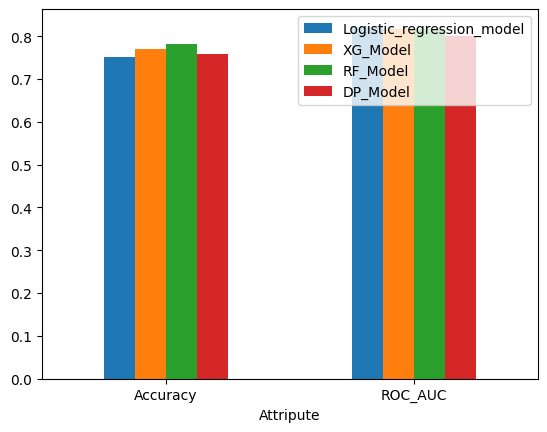

In [67]:
reg_eval = pd.DataFrame({"Attripute": ["Accuracy", "ROC_AUC"],
                         "Logistic_regression_model": [best_accuracy, best_roc],
                         "XG_Model":[best_accuracy_xg,  best_roc_auc_xg],
                         "RF_Model":[best_accuracy_rf,  best_roc_auc_rf],
                         "DP_Model":[accuracy,  roc_auc]
                         })


plt.figure(figsize=(16, 4))
reg_eval.plot.bar(x="Attripute", y=["Logistic_regression_model", "XG_Model", "RF_Model", "DP_Model"], rot=0)

It is Excellent! we have RF_model best accuracys with moderate ROC_AUC

### Save the best Model(RF)

In [68]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, 'churn_model.pkl')


['churn_model.pkl']